In [23]:
import numpy as np
import pandas as pd
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

Итак, мы загрузили данные в таблицу data. Объект data имеет тип DataFrame – это основной тип данных в библиотеке pandas, предназначенный для представления табличных данных.

In [2]:
from sklearn.linear_model import LogisticRegression

data = pd.read_csv('df.csv')
data.head(3)

,ID,Размер,#1 Доля аварийного жилого фонда (%),"#2 Процент населения, живущего в жилье, обеспеченном централизованными услугами тепло-, водо-, электроснабжения, водоотведения",#3 Количество вывезенных ТБО на душу населения (тыс. м3 / чел.),#4 Разнообразие жилой застройки (%),#5 Разнообразие функций в жилой зоне (%),#6 Площадь озелененных территорий общего пользования (парки. сады и др.) к площади всех зеленых насаждений в целом (%),#7 Доступность парков или обустроенного природного ландшафта,#8 Состояние зеленых насаждений(%),...,#22 Разнообразие культурно-спортивных функций в городе(%),#23 Доступность спортивных площадок для горожан(%),#24 Доля объектов культурного наследия. в которых размещаются объекты социально-досуговой инфраструктуры (%),#25 Посещаемость музеев и театров (ед. /1000 чел.),#26 Общее количество ДТП (шт),#27 Среднее расстояние между остановками общественного транспорта(м),#28 Уровень озеленения города(%),#29 Количество мест. в которых сконцентрировано наибольшее количество уличных фотографий из социальных сетей (ед.),#30 Доля горожан. работающих в третичном секторе экономики(%),ИТОГОВЫЙ БАЛЛ
0,1,0,1,6,8,2,1,1,2,2,...,8,1,4,5,6,1,1,2,4,93
1,2,0,9,8,6,10,4,1,3,5,...,10,7,7,1,6,9,6,1,4,141
2,3,0,10,9,5,6,8,1,4,8,...,7,10,1,1,10,8,8,5,6,142


Данные загружены. Попытаемся вначале их качественно проанализировать.

Узнаем размеры таблицы:

In [3]:
data.shape

(1086, 33)

Итак, таблица содержит 324 строки (объекта) и 60 столбцов (признаков), не включая выходной (целевой) признак - им будет балл города, не интересующий нас в процессе выявления корреляций и весов.

С помощью метода describe() получим некоторую сводную информацию по всей таблице. По умолчанию будет выдана информация только для количественных признаков. Это общее их количество (count), среднее значение (mean), стандартное отклонение (std), минимальное (min), макcимальное (max) значения, медиана (50%) и значения нижнего (25%) и верхнего (75%) квартилей:

In [4]:
data.describe()

,ID,Размер,#1 Доля аварийного жилого фонда (%),"#2 Процент населения, живущего в жилье, обеспеченном централизованными услугами тепло-, водо-, электроснабжения, водоотведения",#3 Количество вывезенных ТБО на душу населения (тыс. м3 / чел.),#4 Разнообразие жилой застройки (%),#5 Разнообразие функций в жилой зоне (%),#6 Площадь озелененных территорий общего пользования (парки. сады и др.) к площади всех зеленых насаждений в целом (%),#7 Доступность парков или обустроенного природного ландшафта,#8 Состояние зеленых насаждений(%),...,#22 Разнообразие культурно-спортивных функций в городе(%),#23 Доступность спортивных площадок для горожан(%),#24 Доля объектов культурного наследия. в которых размещаются объекты социально-досуговой инфраструктуры (%),#25 Посещаемость музеев и театров (ед. /1000 чел.),#26 Общее количество ДТП (шт),#27 Среднее расстояние между остановками общественного транспорта(м),#28 Уровень озеленения города(%),#29 Количество мест. в которых сконцентрировано наибольшее количество уличных фотографий из социальных сетей (ед.),#30 Доля горожан. работающих в третичном секторе экономики(%),ИТОГОВЫЙ БАЛЛ
count,1086.000000,1086.000000,1086.000000,1086.000000,1086.000000,1086.000000,1086.000000,1086.000000,1086.000000,1086.000000,...,1086.000000,1086.000000,1086.000000,1086.000000,1086.000000,1086.000000,1086.000000,1086.000000,1086.000000,1086.000000
mean,575.143646,3.467772,9.239411,6.061694,2.297422,5.130755,5.371087,2.956722,3.918969,6.107735,...,6.493554,5.997238,1.614180,1.376611,8.037753,7.185083,6.709024,4.331492,6.150092,137.812155
std,324.182590,0.967858,1.720506,3.081215,1.498673,2.398047,2.390352,2.742559,2.808294,1.926386,...,2.239868,2.729763,1.770038,1.240249,1.704819,2.245281,2.408903,1.858760,1.851276,15.321611
min,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,87.000000
25%,298.250000,3.000000,9.000000,4.000000,1.000000,3.000000,4.000000,1.000000,1.000000,5.000000,...,5.000000,4.000000,1.000000,1.000000,7.000000,6.000000,5.000000,3.000000,5.000000,127.000000
50%,575.500000,4.000000,10.000000,7.000000,2.000000,5.000000,6.000000,2.000000,3.000000,6.000000,...,7.000000,6.000000,1.000000,1.000000,8.000000,8.000000,7.000000,4.000000,6.000000,137.000000
75%,854.500000,4.000000,10.000000,9.000000,3.000000,7.000000,7.000000,4.000000,6.000000,7.000000,...,8.000000,8.000000,1.000000,1.000000,9.000000,9.000000,9.000000,5.000000,7.000000,147.000000
max,1138.000000,4.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,214.000000


Функция scatter_matrix из модуля pandas.tools.plotting позволяет построить для каждой количественной переменной гистограмму, а для каждой пары таких переменных – диаграмму рассеяния:

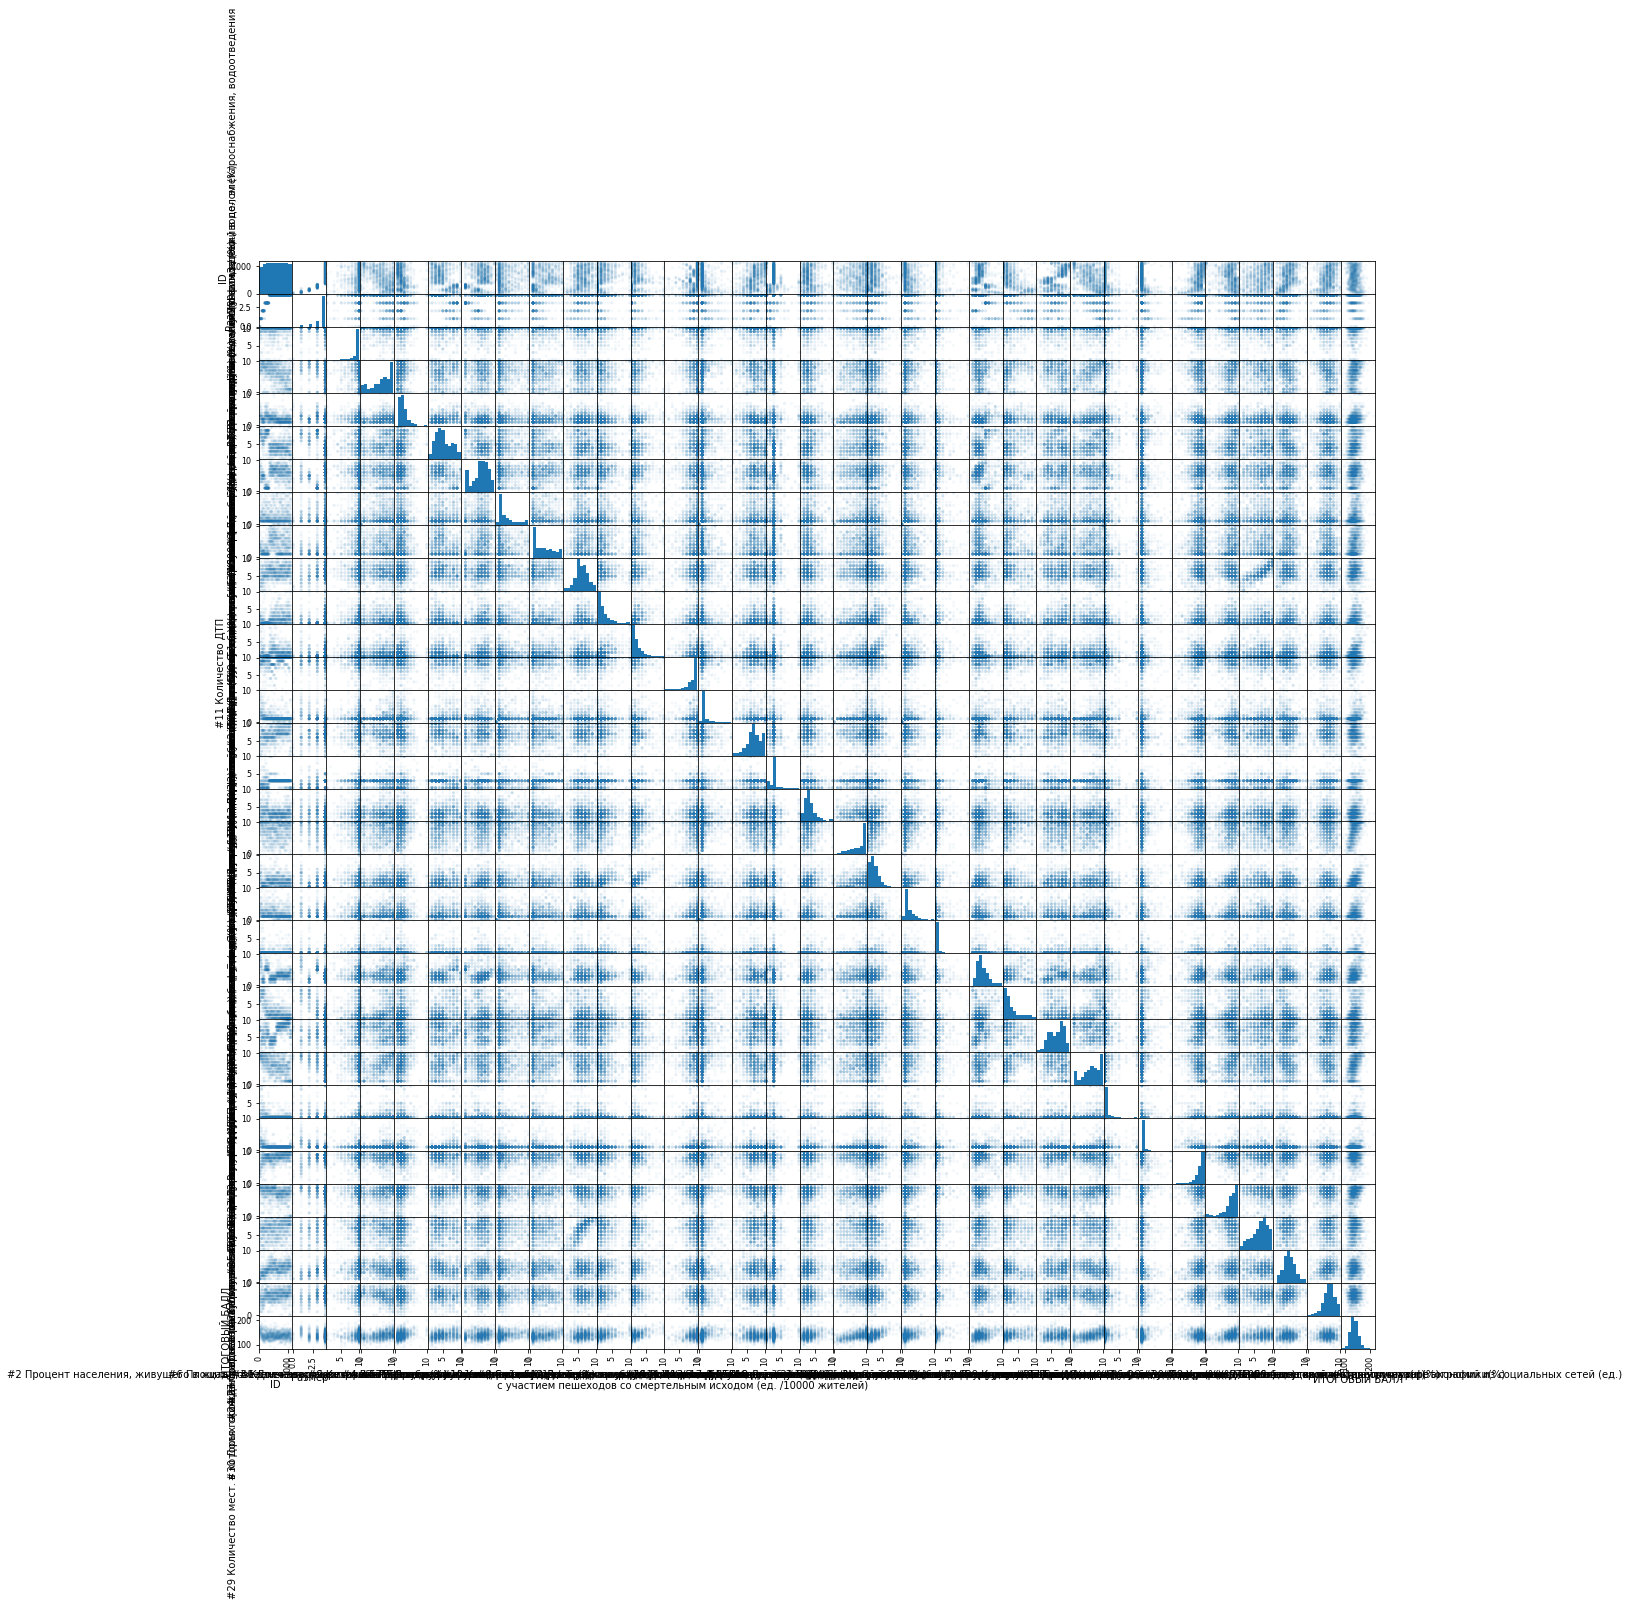

In [5]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(data, alpha=0.05, figsize=(20, 20));

Для большего понимания построим матрицу корреляций всех признаков со всеми и будем считать значительными превосходящие 0.4 по модулю кроме диагональных.

In [18]:
a = data.iloc[:, 1:32].corr()
a.to_excel('example.xlsx')

В отличие от задачи классификации или регресии, в случае кластеризации сложнее выбрать критерий, с помощью которого было бы просто представить задачу кластеризации как задачу оптимизации.
В случае kMeans распространен такой критерий – сумма квадратов расстояний от точек до центроидов кластеров, к которым они относятся, назовем эту функцию J(C).

Понятно, что здравый смысл в этом есть: нам нужно чтобы точки располагались кучно возле центров своих кластеров. Но вот незадача: минимум такого функционала будет достигаться тогда, когда кластеров столько же, сколько и точек (то есть каждая точка – это кластер из одного элемента).
Для решения этого вопроса (выбора числа кластеров) часто пользуются такой эвристикой: выбирают то число кластеров, начиная с которого описанный функционал падает уже не так быстро. 

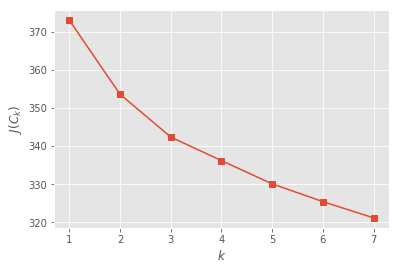

In [25]:
from sklearn.cluster import KMeans

X = data.iloc[:, 1:31].as_matrix()

inertia = []
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X)
    inertia.append(np.sqrt(kmeans.inertia_))

plt.plot(range(1, 8), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$');

Видим, что J функция падает сильно при увеличении числа кластеров с 1 до 2 и с 2 до 3, и уже не так сильно – при изменении ее с 3 до 4. Значит, в данной задаче оптимально задать 3 кластера.

In [51]:
# Добавим номер кластера каждому городу отдельным столбцом и сохраним эту таблицу
X = data.iloc[:, 1:31].as_matrix()

from sklearn import cluster
k = 3

centroids, labels, inertia = cluster.k_means(X, n_clusters = k)

data['cluster'] = labels
data
data.to_excel('with_clusters.xlsx')

In [27]:
# Посмотрим на количество городов в каждом кластере
k3sizes = data.groupby('cluster').size()
k3sizes

cluster
0    313
1    458
2    315
dtype: int64

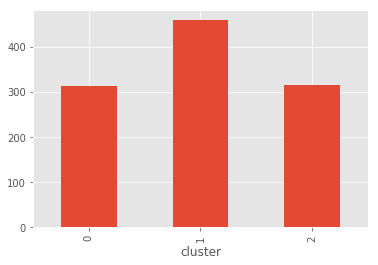

In [28]:
graph = k3sizes.plot(kind = 'bar')

In [52]:
# Посчитаем средние значения фич для каждого, снова сохраним таблицу
k3means = data.groupby('cluster').mean()
f = k3means.T
f.to_excel('clusters_description.xlsx')

In [31]:
# Получим более полное описание
k3desc = data.groupby('cluster').describe()
k3desc

#1 Доля аварийного жилого фонда (%)                                 \
                                      count      mean       std  min   25%   
cluster                                                                      
0                                     313.0  9.095847  1.966975  1.0   9.0   
1                                     458.0  9.393013  1.535330  1.0  10.0   
2                                     315.0  9.158730  1.700565  1.0   9.0   

                           \
          50%   75%   max   
cluster                     
0        10.0  10.0  10.0   
1        10.0  10.0  10.0   
2        10.0  10.0  10.0   

        #10 Количество разнообразных услуг для горожан в зеленой зоне (ед. / км2)  \
                                                                            count   
cluster                                                                             
0                                                    313.0                          
1                                                    458.0                          
2                                                    315.0                          

                  ...  ИТОГОВЫЙ БАЛЛ        Размер                           \
             mean ...            75%    max  count      mean       std  min   
cluster           ...                                                         
0        1.795527 ...          149.0  197.0  313.0  2.265176  0.991939  0.0   
1        1.831878 ...          139.0  165.0  458.0  3.973799  0.173051  2.0   
2        3.406349 ...          154.0  214.0  315.0  3.926984  0.434648  0.0   

                             
         25%  50%  75%  max  
cluster                      
0        2.0  2.0  3.0  4.0  
1        4.0  4.0  4.0  4.0  
2        4.0  4.0  4.0  4.0  

[3 rows x 264 columns]

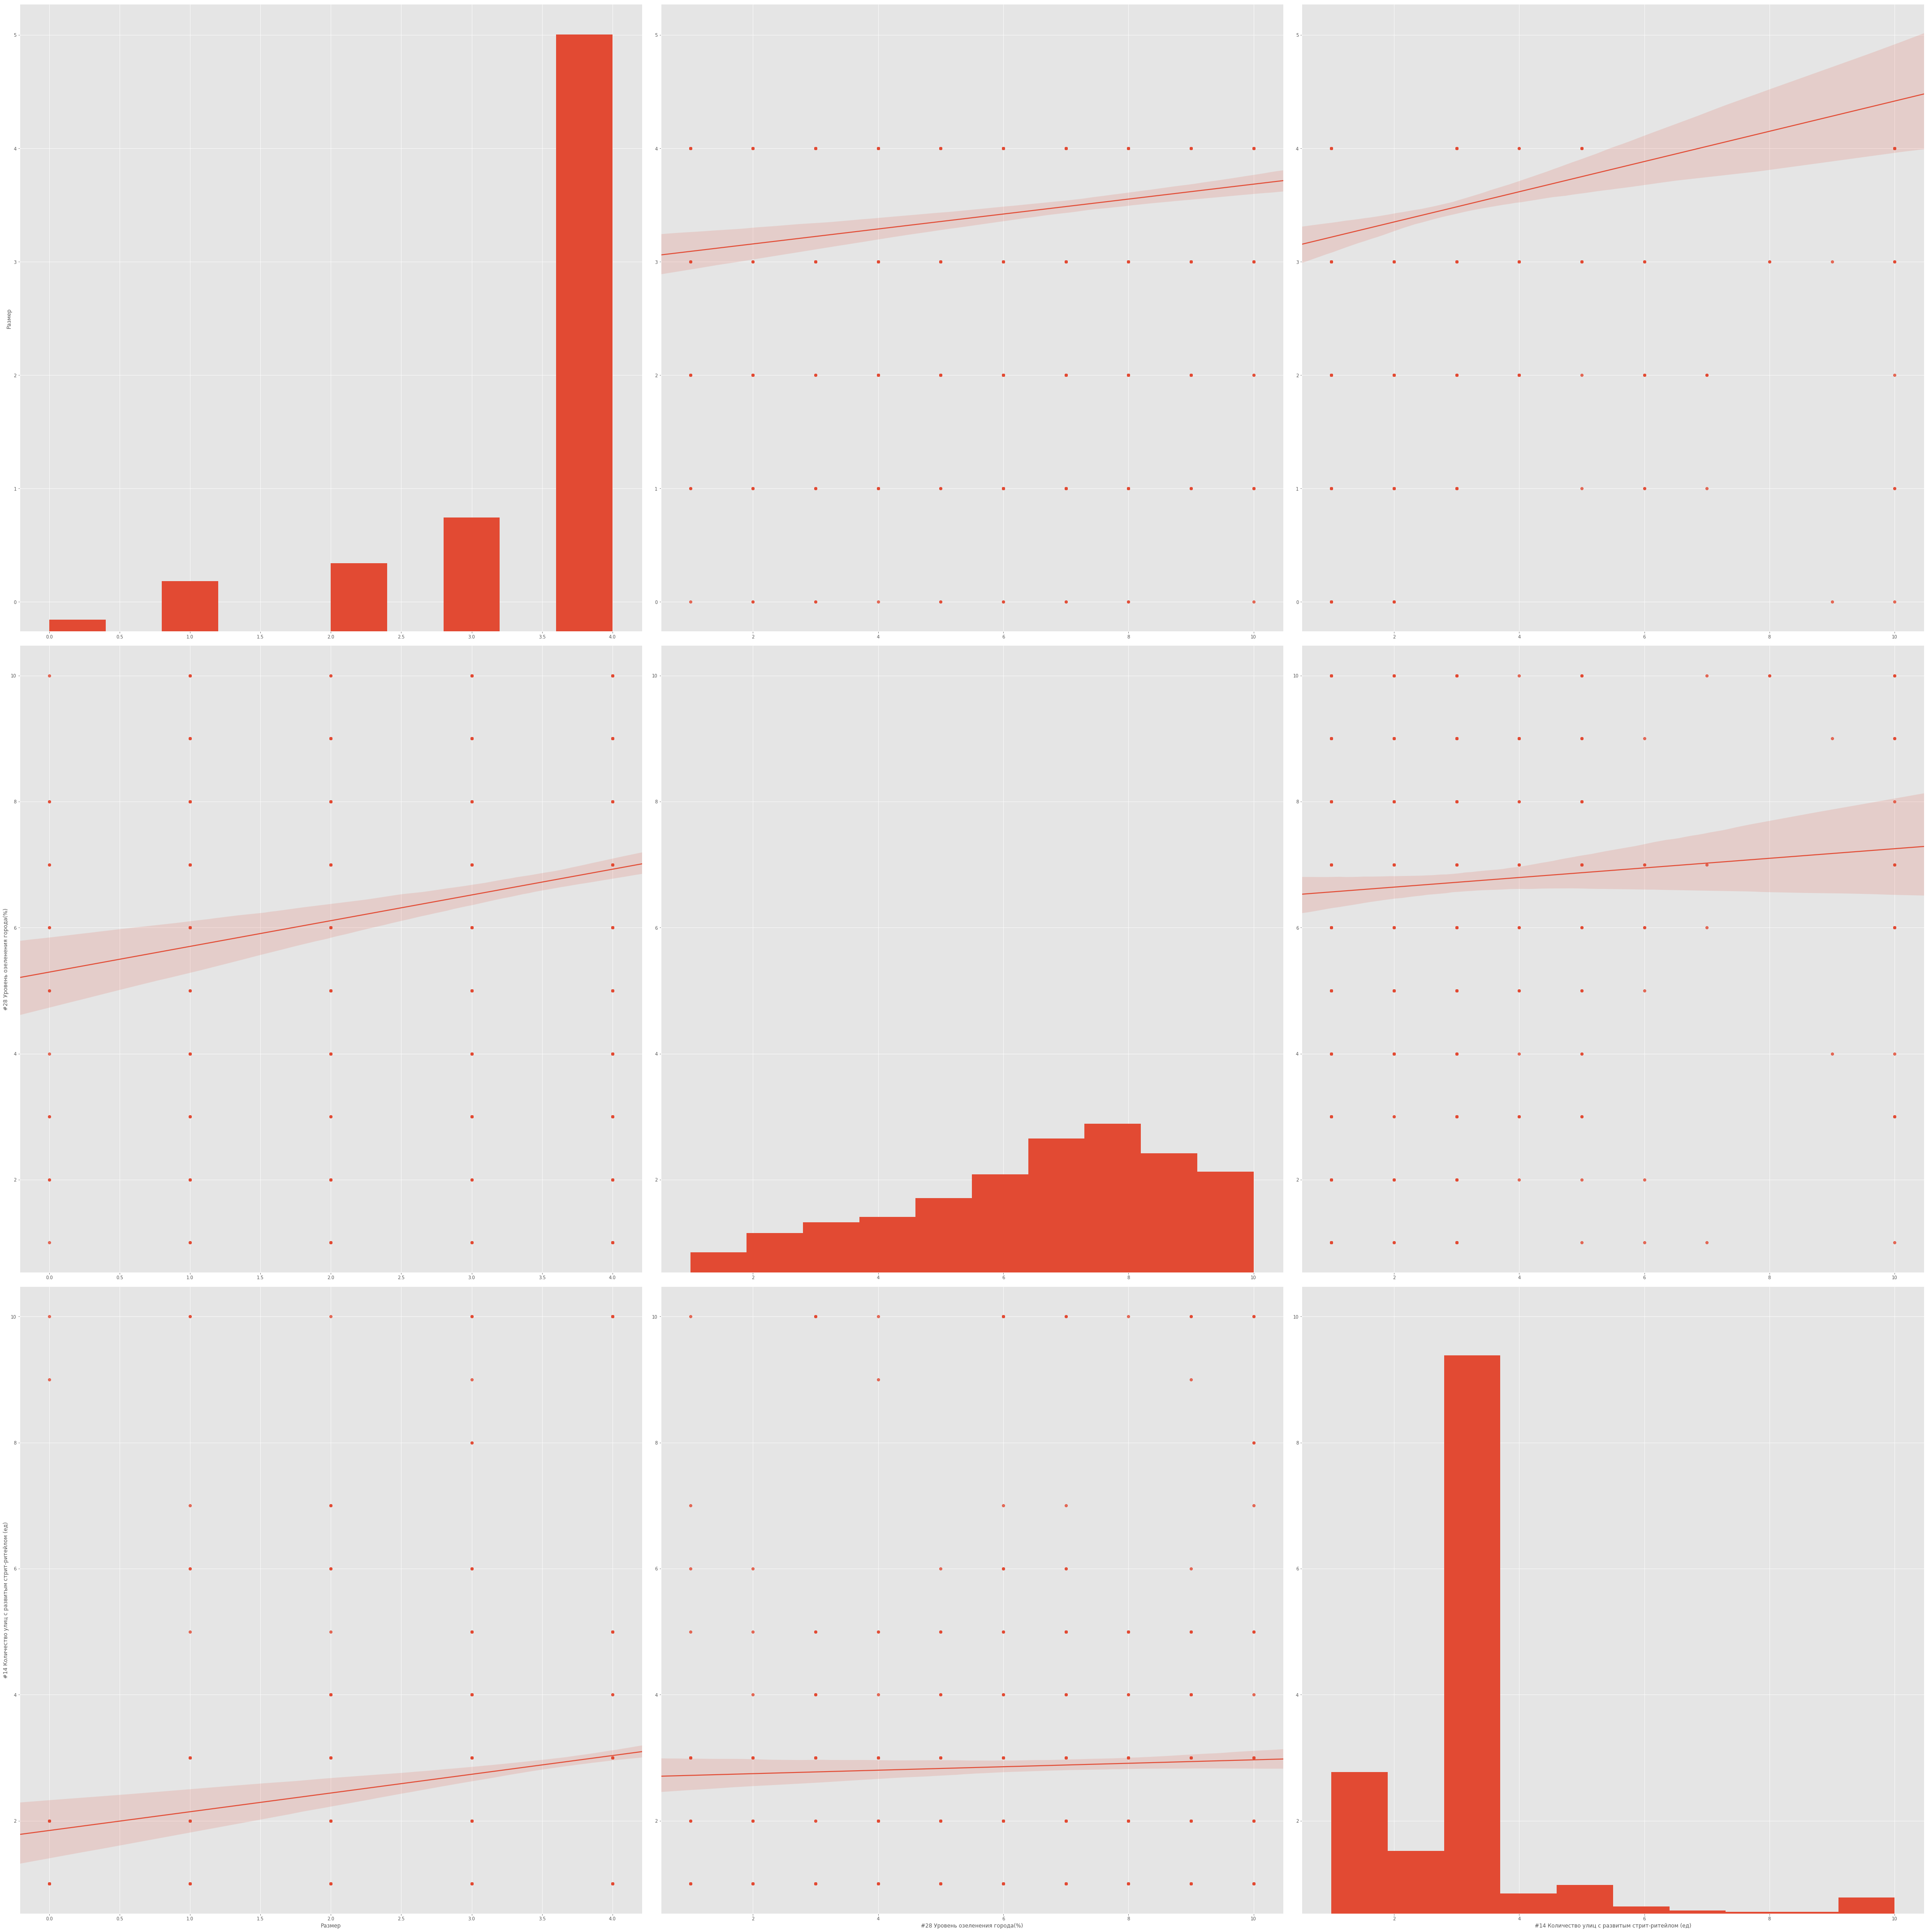

In [37]:
# Построим pair plot (scatter plot matrix). Эта визуализация поможет нам посмотреть на одной картинке, как связаны между собой различные признаки. Названия можно менять.
# Как можно видеть, на диагонали матрицы графиков расположены гистограммы распределений признака. Остальные же графики — это обычные scatter plots для соответствующих пар признаков.
import seaborn as sns
pairs = sns.pairplot(data, kind = 'reg', diag_kind = 'hist', size = 20, vars = ['Размер', '#28 Уровень озеленения города(%)', '#14 Количество улиц с развитым стрит-ритейлом (ед)'])

In [39]:
to_plot = data.set_index('cluster')
to_plot = to_plot.stack()
to_plot.head()

cluster                                                                                                                                
0        ID                                                                                                                                1
         Размер                                                                                                                            0
         #1 Доля аварийного жилого фонда (%)                                                                                               1
         #2 Процент населения, живущего в жилье, обеспеченном централизованными услугами тепло-, водо-, электроснабжения, водоотведения    6
         #3 Количество вывезенных ТБО на душу населения (тыс. м3 / чел.)                                                                   8
dtype: int64

In [43]:
to_plot = to_plot.reset_index()
to_plot = to_plot.rename(columns={'level_1': 'Feature', 0: 'Values'})
to_plot.head()

,cluster,Feature,Values
0,0,ID,1
1,0,Размер,0
2,0,#1 Доля аварийного жилого фонда (%),1
3,0,"#2 Процент населения, живущего в жилье, обеспе...",6
4,0,#3 Количество вывезенных ТБО на душу населения...,8


ValueError: left cannot be >= right

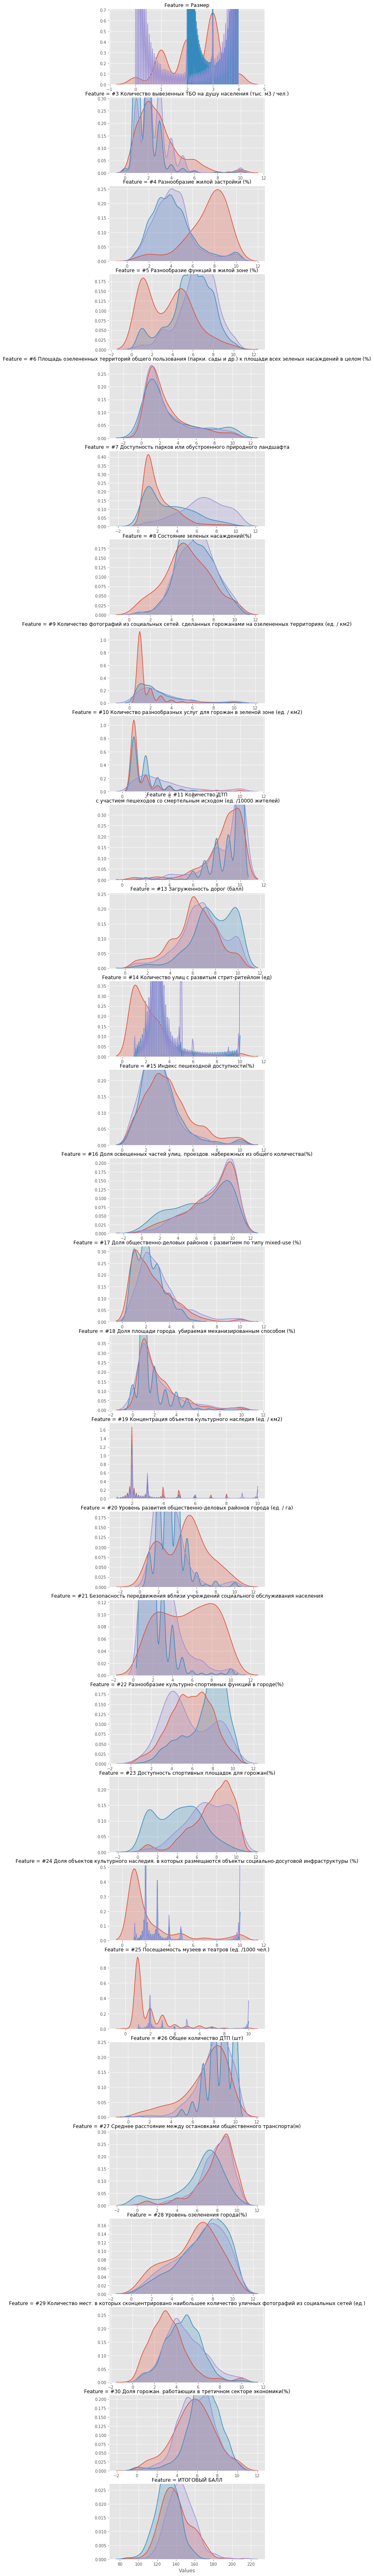

In [50]:
# Описание графиков ниже!
# Здесь красным - 0 кластер, голубым - 1, фиолетовым -2
ratings_to_plot = to_plot[to_plot['Feature'].isin(['Размер', \
'#1 Доля горожан. живущих в аварийном жилом фонде (%)', \
'#2 Доля жилого фонда. обеспеченного централизованными услугами тепло-. водо-. электроснабжения. водоотведения', \
'#3 Количество вывезенных ТБО на душу населения (тыс. м3 / чел.)', \
'#4 Разнообразие жилой застройки (%)', \
'#5 Разнообразие функций в жилой зоне (%)', \
'#6 Площадь озелененных территорий общего пользования (парки. сады и др.) к площади всех зеленых насаждений в целом (%)', \
'#7 Доступность парков или обустроенного природного ландшафта', \
'#8 Состояние зеленых насаждений(%)', \
'#9 Количество фотографий из социальных сетей. сделанных горожанами на озелененных территориях (ед. / км2)', \
'#10 Количество разнообразных услуг для горожан в зеленой зоне (ед. / км2)', \
'#11 Количество ДТП\n с участием пешеходов со смертельным исходом (ед. /10000 жителей)', \
'#12 Доля улично-дорожной сети. обеспеченной ливневой канализацией', \
'#13 Загруженность дорог (балл)', \
'#14 Количество улиц с развитым стрит-ритейлом (ед)', \
'#15 Индекс пешеходной доступности(%)', \
'#16 Доля освещенных частей улиц. проездов. набережных из общего количества(%)', \
'#17 Доля общественно-деловых районов с развитием по типу mixed-use (%)', \
'#18 Доля площади города. убираемая механизированным способом (%)', \
'#19 Концентрация объектов культурного наследия (ед. / км2)', \
'#20 Уровень развития общественно-деловых районов города (ед. / га)', \
'#21 Безопасность передвижения вблизи учреждений социального обслуживания населения', \
'#22 Разнообразие культурно-спортивных функций в городе(%)', \
'#23 Доступность спортивных площадок для горожан(%)', \
'#24 Доля объектов культурного наследия. в которых размещаются объекты социально-досуговой инфраструктуры (%)', \
'#25 Посещаемость музеев и театров (ед. /1000 чел.)', \
'#26 Общее количество ДТП (шт)', \
'#27 Среднее расстояние между остановками общественного транспорта(м)', \
'#28 Уровень озеленения города(%)', \
'#29 Количество мест. в которых сконцентрировано наибольшее количество уличных фотографий из социальных сетей (ед.)', \
'#30 Доля горожан. работающих в третичном секторе экономики(%)', \
'ИТОГОВЫЙ БАЛЛ'])]

facets = sns.FacetGrid(data=ratings_to_plot, row='Feature', hue='cluster', \
                  sharey=False, sharex=False, aspect=2)
# Build the plot as a sns.kdeplot
_ = facets.map(sns.kdeplot, 'Values', shade=True).add_legend()
plt.savefig('cities_clusters.png')

Здесь мы изобразили распределение величин для каждой группы, используя функцию, оценивающую плотность ядер.

Эта визуализация показывает разницу между. распределениями величин в разных кластерах. Несмотря на то, что в некоторых признаках различия еле заметны(6, 8, 16, 17) и это значит, что, скорее всего, разброс этих величин в рамках датасета невелик сам по себе(и это мы можем проверить с помощью диаграм выше), другие помогают нам понять, по каким параметрам алгоритм рассортировал города в три разные группы. 

Например, можно точно сказать, что для 0 группы более характерна доступность спортивных площадок и безопасноть передвижений вблизи социальных объектов.
Также понятно, что некоторые переменные содержат шумные данные, и смотря на их распределение в рамках группы, не удается сделать вывод о характерных чертах.

Узнать количество заполненных (непропущенных) элементов можно с помощью метода count. Параметр axis = 0 указывает, что мы двигаемся по размерности 0 (сверху вниз), а не размерности 1 (слева направо), т.е. нас интересует количество заполненных элементов в каждом столбце, а не строке:

In [28]:
data.count(axis=0)

ID                                                                                                                                                                        324
Размер                                                                                                                                                                    324
#1 Доля горожан. живущих в аварийном жилом фонде (%)                                                                                                                      260
#2 Доля жилого фонда. обеспеченного централизованными услугами тепло-. водо-. электроснабжения. водоотведения                                                             293
#3 Количество вывезенных ТБО на душу населения (тыс. м3 / чел.)                                                                                                           315
#4 Разнообразие жилой застройки (%)                                                                                               

Заполнить пропущенные значения можно с помощью метода fillna. Заполним, например, медианными значениями.

axis=0 по-прежнему указывает, что мы двигаемся сверху вниз:

In [29]:
data = data.fillna(data.median(axis=0), axis=0)

Проверим, что теперь все столбцы, соответствующие количественным признакам, заполнены.

In [30]:
data.count(axis=0)

ID                                                                                                                                                                        324
Размер                                                                                                                                                                    324
#1 Доля горожан. живущих в аварийном жилом фонде (%)                                                                                                                      324
#2 Доля жилого фонда. обеспеченного централизованными услугами тепло-. водо-. электроснабжения. водоотведения                                                             324
#3 Количество вывезенных ТБО на душу населения (тыс. м3 / чел.)                                                                                                           324
#4 Разнообразие жилой застройки (%)                                                                                               

In [ ]:
X, y = load_digits(return_X_y=True)

clf = LogisticRegression()
clf.fit(X, y)
clf.predict(X)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=True)

clf = LogisticRegression()
clf.fit(X_train, y_train)

accuracy_score(y_test, clf.predict(X_test))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier

classifiers = [LogisticRegression(), KNeighborsClassifier(), LinearSVC()]

for clf in classifiers:
    clf.fit(X_train, y_train)
    score = accuracy_score(y_test, clf.predict(X_test))
    clf_name = clf.__class__.__name__
    print('{: <32} :{:.4f}'.format(clf_name, score))